In [15]:
import SimpleITK as sitk
import os
from lungSegmentation import LungSegmentation
import matplotlib.pyplot as plt

In [21]:
def segmentAndSaveImage(originalImagePath, segmentedImagePath, segmentedMaskPath):
    # Read the original image
    originalImage = sitk.ReadImage(originalImagePath)
    originalData = sitk.GetArrayFromImage(originalImage).astype("int16")  # Ensure 16-bit signed integer

    # Segment the image 
    lungSeg = LungSegmentation(originalImagePath)
    predictedMask = lungSeg.segmentLung().astype("int16")  # Ensure mask is 16-bit signed integer
    segmentedData = (predictedMask * originalData).astype("int16")  # Ensure 16-bit signed integer

    # Create a new SimpleITK image for the segmented data
    segmentedMask = sitk.GetImageFromArray(predictedMask)
    segmentedImage = sitk.GetImageFromArray(segmentedData)

    # Copy metadata from the original image to the segmented image
    for key in originalImage.GetMetaDataKeys():
        value = originalImage.GetMetaData(key)
        segmentedImage.SetMetaData(key, value)
        segmentedMask.SetMetaData(key, value)

    # Set the same spacing, origin, and direction as the original image
    segmentedImage.SetSpacing(originalImage.GetSpacing())
    segmentedImage.SetOrigin(originalImage.GetOrigin())
    segmentedImage.SetDirection(originalImage.GetDirection())

    segmentedMask.SetSpacing(originalImage.GetSpacing())
    segmentedMask.SetOrigin(originalImage.GetOrigin())
    segmentedMask.SetDirection(originalImage.GetDirection())

    # Save the segmented image and mask with the original metadata
    os.makedirs(os.path.dirname(segmentedImagePath), exist_ok=True)
    os.makedirs(os.path.dirname(segmentedMaskPath), exist_ok=True)
    sitk.WriteImage(segmentedImage, segmentedImagePath)
    sitk.WriteImage(segmentedMask, segmentedMaskPath)

In [22]:
datasetDirectory = "../dataset/"

for i in range(1,5):
    for status in ["i", "e"]:
        originalImagePath = os.path.join(datasetDirectory, f"copd{i}/copd{i}_{status}BHCT.nii.gz")
        segmentedImagePath = os.path.join(datasetDirectory, f"copd{i}/segmentations/copd{i}_{status}BHCT_segmented.nii.gz")
        segmentedMaskPath = os.path.join(datasetDirectory, f"copd{i}/segmentations/copd{i}_{status}BHCT_mask.nii.gz")

        print(originalImagePath)
        segmentAndSaveImage(originalImagePath, segmentedImagePath, segmentedMaskPath)

../dataset/copd1/copd1_iBHCT.nii.gz
../dataset/copd1/copd1_eBHCT.nii.gz
../dataset/copd2/copd2_iBHCT.nii.gz
../dataset/copd2/copd2_eBHCT.nii.gz
../dataset/copd3/copd3_iBHCT.nii.gz
../dataset/copd3/copd3_eBHCT.nii.gz
../dataset/copd4/copd4_iBHCT.nii.gz
../dataset/copd4/copd4_eBHCT.nii.gz


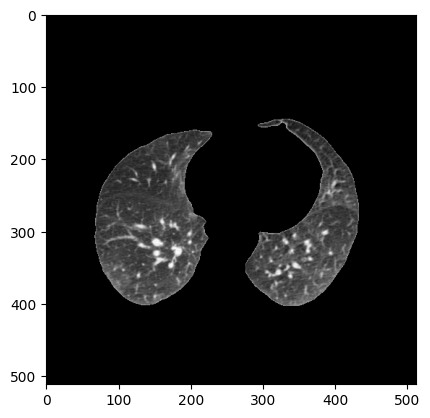

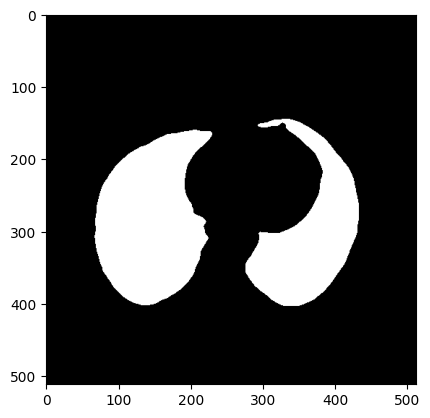

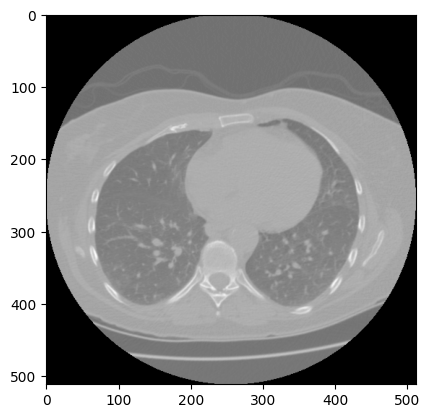

In [23]:
# check the segmented image
segmentedImage = sitk.ReadImage(segmentedImagePath)
segmentedData = sitk.GetArrayFromImage(segmentedImage)
plt.imshow(segmentedData[segmentedData.shape[0]//2], cmap='gray')
plt.show()

# check the segmented mask
segmentedMask = sitk.ReadImage(segmentedMaskPath)
segmentedMaskData = sitk.GetArrayFromImage(segmentedMask)
plt.imshow(segmentedMaskData[segmentedMaskData.shape[0]//2], cmap='gray')
plt.show()

# check the original image
originalImage = sitk.ReadImage(originalImagePath)
originalData = sitk.GetArrayFromImage(originalImage)
plt.imshow(originalData[originalData.shape[0]//2], cmap='gray')
plt.show()

In [24]:
# Check the image types
print("Original image type:", originalImage.GetPixelIDTypeAsString())
print("Segmented image type:", segmentedImage.GetPixelIDTypeAsString())
print("Segmented mask type:", segmentedMask.GetPixelIDTypeAsString())

Original image type: 16-bit signed integer
Segmented image type: 16-bit signed integer
Segmented mask type: 16-bit signed integer
